In [86]:
import matplotlib.pyplot as plt
import numpy as np
import math


from scipy.signal import find_peaks
from scipy.integrate import odeint
from scipy.stats import gaussian_kde


In [87]:
# Set random seed (for reproducibility)
np.random.seed(1000)

# Start and end time (in milliseconds)
tmin = 0.0
tmax = 1000.0

# Average potassium channel conductance per unit area (mS/cm^2)
gK = 36.0

# Average sodoum channel conductance per unit area (mS/cm^2)
gNa = 120.0

# Average leak channel conductance per unit area (mS/cm^2)
gL = 0.3

# Membrane capacitance per unit area (uF/cm^2)
Cm = 1.0

# Potassium potential (mV)
VK = -12.0

# Sodium potential (mV)
VNa = 115.0

# Leak potential (mV)
Vl = 10.613

# Time values
T = np.linspace(tmin, tmax, 10000)

# Potassium ion-channel rate functions

def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)

def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions

def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)

def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)
  
# n, m, and h steady-state values

def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))

In [88]:
def id(n):
    return 5

In [89]:
# Compute derivatives
def compute_derivatives(y, T):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (id(T) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy
  
# State (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])


# Solve ODE system
# Vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])


In [90]:
def Vy1(listv):
    Vm_list = []
    for i in Vy:
        Vm_list.append(i[0])

    return Vm_list

In [91]:
def ISI(nx):
    list_nx = []
    for i in range(1,len(nx)):
        list_nx.append(nx[i]-nx[i-1])
    
    return list_nx

In [92]:
#I_input = np.linspace(5,200,196)
I_input = np.linspace(25,150,6)
crit = 26.21073427

#For Activation Function
peaklist = []

#For heights of "peaks"
ny_list = []

#For height data regardless of peak or not. Takes all heights
ny_distribution = []

#distribution of peak heights per _
list25 = []
list50 = []
list75 = []
list100 = []
list125 = []
list150 = []
list175 = []
list200 = []
listall = []
ISI_list = [list25, list50, list75, list100, list125, list150, list175, list200]


list25a = []
list50a = []
list75a = []
list100a = []
list125a = []
list150a = []
list175a = []
list200a = []
listall = []
run_list = [list25a, list50a, list75a, list100a, list125a, list150a]

c = 0

In [93]:
for i in I_input:
    def id(t):
        return i
    Vy = odeint(compute_derivatives, Y, T)
    rawdata = Vy1(Vy)


    #Some random counter
    run_list[c].append(rawdata)

    #For dataset of making KDE of distribution of datapoints
    ny_distribution = ny_distribution + rawdata
    #print(ny_distribution)

    #For computing the peaks
    nx = find_peaks(rawdata, height=crit)[0]
    peaklist.append(len(nx))
    print(nx)
    print(len(nx))

    
    list1 = []
    for j in nx:
        ny = rawdata[j]
        list1.append(ny)

    for k in range(1,len(list1)):
        ISI_list[c].append(nx[k] - nx[k-1])
    

    c = c+1

[  14  127  235  343  450  558  665  773  880  988 1095 1203 1310 1418
 1525 1633 1740 1848 1955 2063 2170 2278 2385 2493 2600 2708 2815 2923
 3030 3138 3245 3353 3460 3568 3675 3783 3890 3998 4105 4213 4320 4428
 4535 4643 4750 4858 4965 5073 5180 5288 5395 5503 5610 5718 5825 5933
 6040 6148 6255 6363 6470 6578 6685 6793 6900 7008 7115 7222 7330 7437
 7545 7652 7760 7867 7975 8082 8190 8297 8405 8512 8620 8727 8835 8942
 9050 9157 9265 9372 9480 9587 9695 9802 9910]
93
[  10  105  191  277  362  448  533  618  704  789  875  960 1046 1131
 1216 1302 1387 1473 1558 1644 1729 1815 1900 1985 2071 2156 2242 2327
 2413 2498 2583 2669 2754 2840 2925 3011 3096 3182 3267 3352 3438 3523
 3609 3694 3780 3865 3950 4036 4121 4207 4292 4378 4463 4548 4634 4719
 4805 4890 4976 5061 5147 5232 5317 5403 5488 5574 5659 5745 5830 5915
 6001 6086 6172 6257 6343 6428 6513 6599 6684 6770 6855 6941 7026 7112
 7197 7282 7368 7453 7539 7624 7710 7795 7880 7966 8051 8137 8222 8308
 8393 8478 8564 8649 8735 8

In [94]:
for i in range(len(I_input)):
    listall += ISI_list[i]

print(peaklist)

[93, 117, 134, 147, 159, 13]


In [95]:
print(ISI_list)

[[113, 108, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108, 107, 108], [95, 86, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 86, 85, 85, 86, 85, 86, 85, 86, 85, 85, 86], [86, 76, 75, 75, 74, 75, 75, 74, 75, 74, 75, 74, 75, 74, 75, 75, 74, 75

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

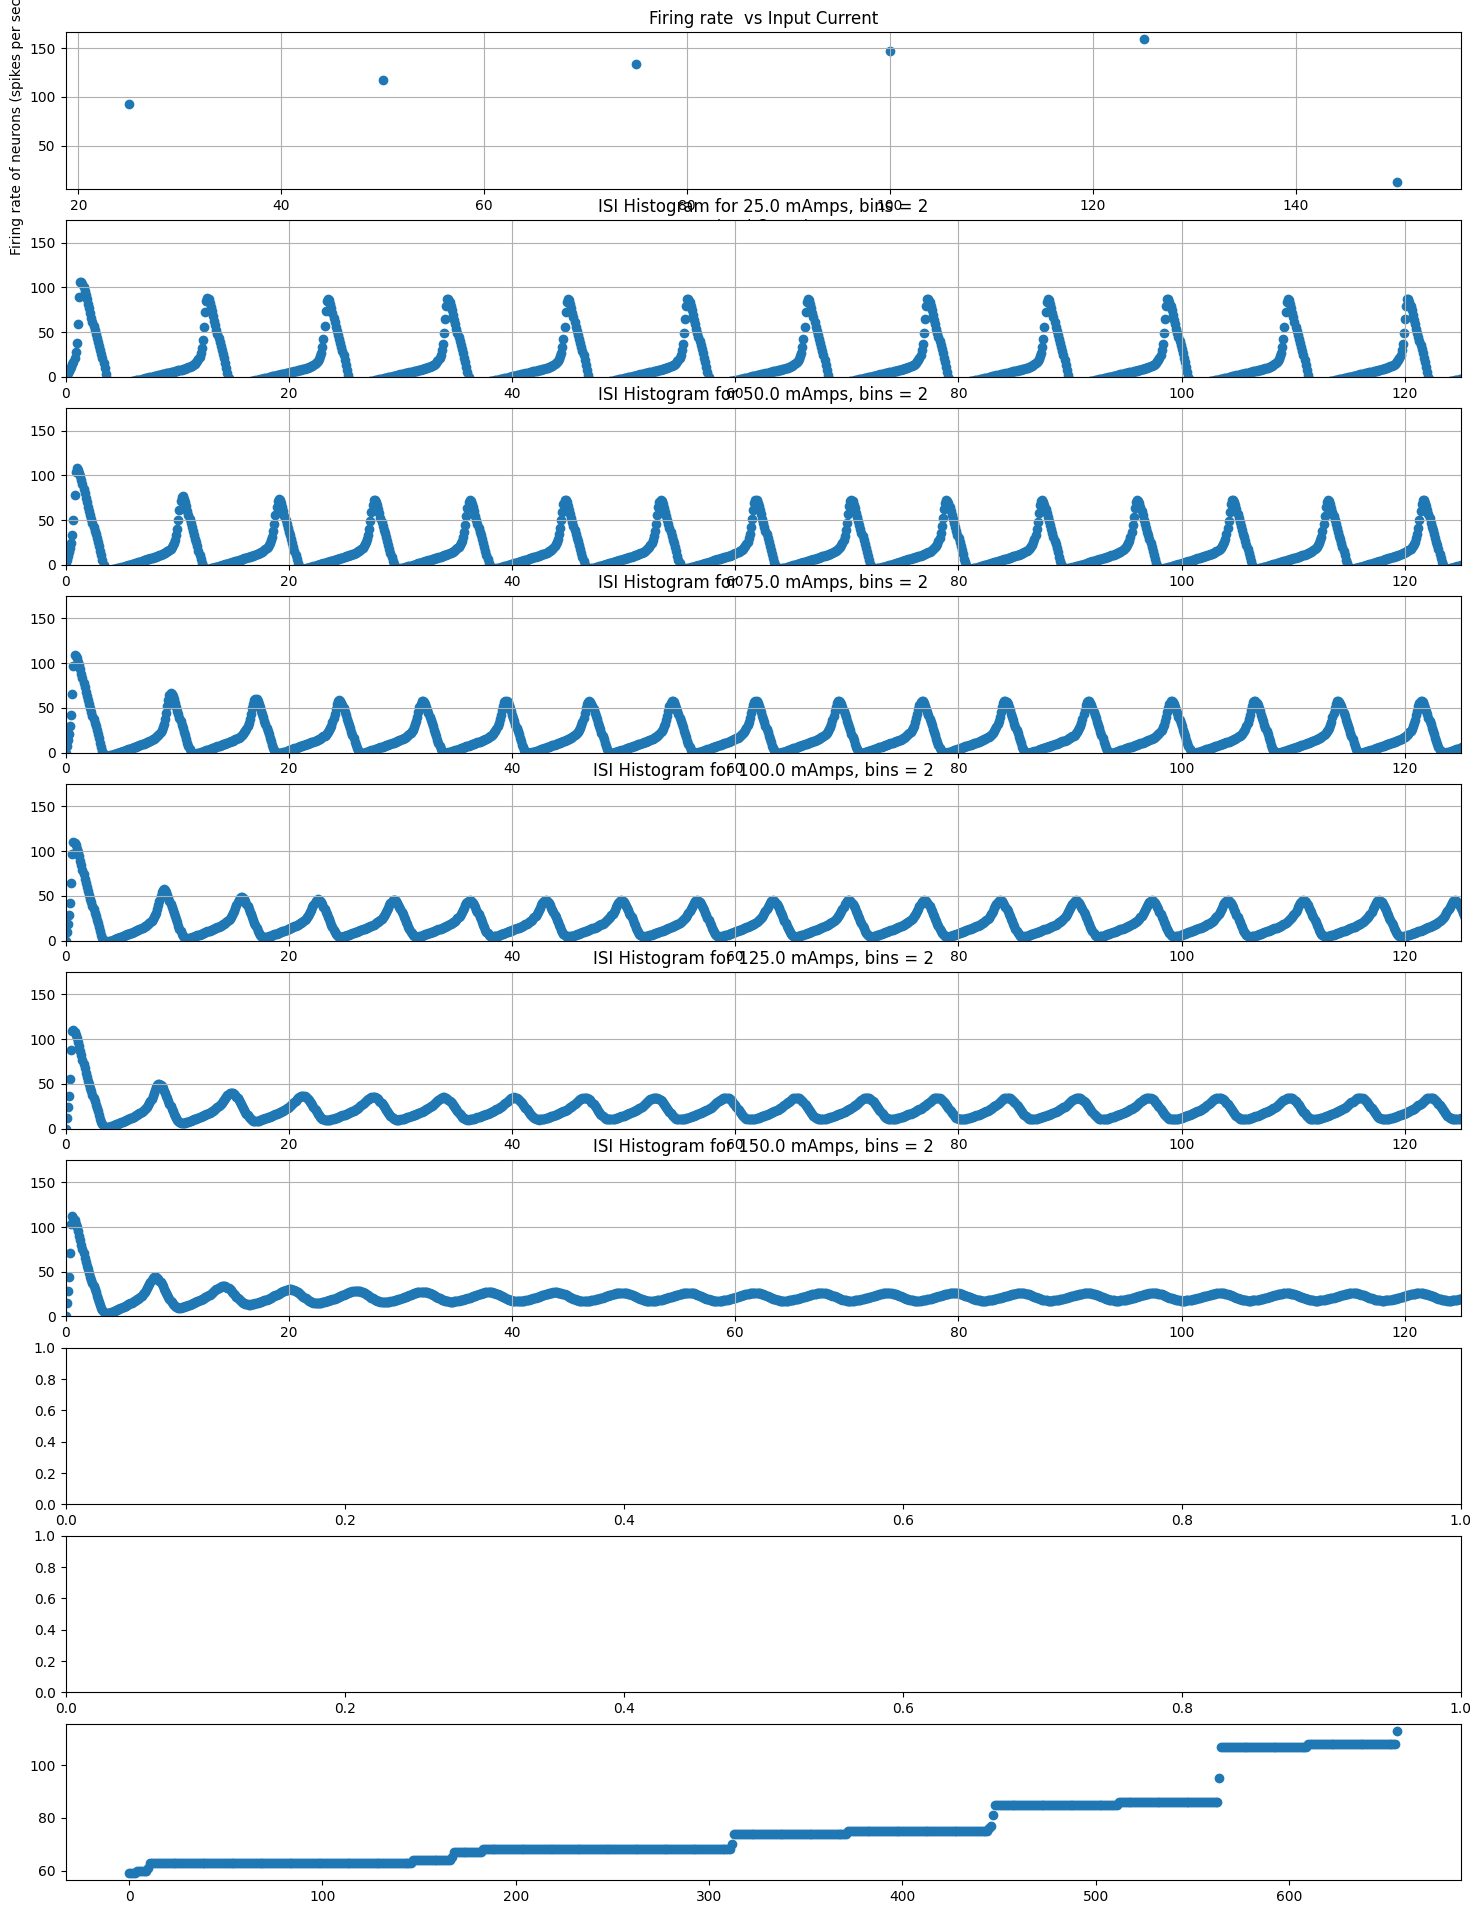

In [101]:
# Neuron potential
fig, axs = plt.subplots(10,1,figsize=(18, 24))
axs[0].scatter(I_input, peaklist)
axs[0].set_xlabel('Input Current')
axs[0].set_ylabel('Firing rate of neurons (spikes per second)')
axs[0].set_title('Firing rate  vs Input Current')
axs[0].grid(True)

for i in range(6):
    bin_num = math.floor(np.sqrt(len(ISI_list)))
    axs[i+1].scatter(T, run_list[i] )
    axs[i+1].set_ylim(0,175)
    axs[i+1].set_xlim(0,125)
    axs[i+1].grid(True)
    axs[i+1].set_title(f'ISI Histogram for {I_input[i]} mAmps, bins = {bin_num}')
    axs[i+1].grid(True)

listall = sorted(listall)
axs[9].scatter([j for j in range(len(listall))],listall)
#axs[9].set_xlim(0,125)

plt.tight_layout

In [ ]:
print(np.max(list25a))

106.22915661512833
